In [11]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ani2x import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def get_list(name):
    with open(f'./losses/{name}.txt', 'r') as f:
        lines = f.readlines()
        lines = [float(line.rstrip('\n')) for line in lines]
    return lines

def get_losses_kind(kind, train_valid, n_models=8):
    losses = []
    for i in range(n_models):
        name = f'{train_valid}_losses_{kind}_{i}'
        losses.append(get_list(name))
    return np.array(losses)

In [13]:
losses_pre_train = get_losses_kind('pre', 'train')
losses_rand_train = get_losses_kind('rand', 'train')
losses_pre_valid = get_losses_kind('pre', 'valid')
losses_rand_valid = get_losses_kind('rand', 'valid')

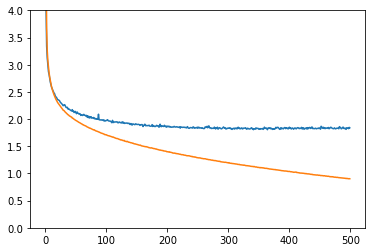

In [14]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 4);

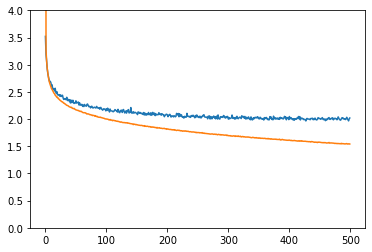

In [15]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

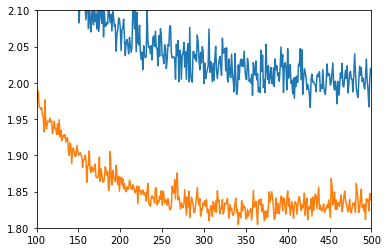

In [53]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.8, 2.1);
plt.xlim(100, 500);

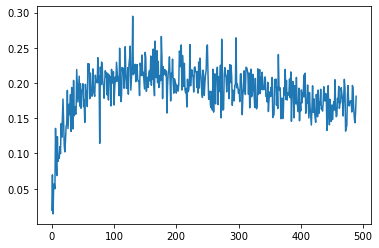

In [49]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

In [17]:
losses_pre_valid.mean(axis=0)[:25].min() / losses_rand_valid.mean(axis=0)[:25].min()

0.9587369035225872

In [18]:
losses_rand_valid.mean(axis=0)[-20:].mean() - losses_rand_valid.mean(axis=0)[120:140].mean()

-0.13490975929735827

In [19]:
losses_pre_valid.mean(axis=0)[-20:].mean() - losses_pre_valid.mean(axis=0)[120:140].mean()

-0.09320694373833982

(120.0, 200.0)

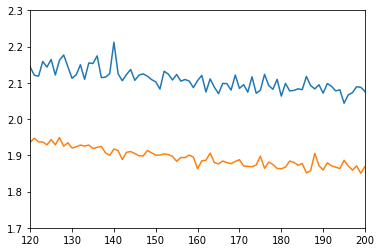

In [20]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 200)

In [178]:
# with open('./empty_pdb_ids.txt', 'w+') as f:
#     for line in list(empty_pdb_ids):
#         f.write(f"{line}\n")

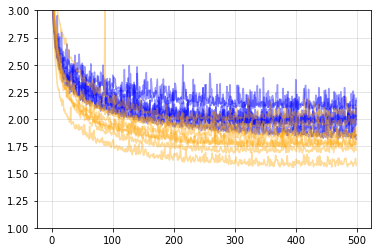

In [21]:
for loss in losses_rand_valid:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='orange', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

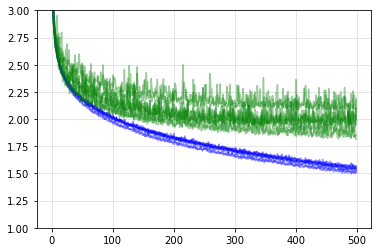

In [24]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

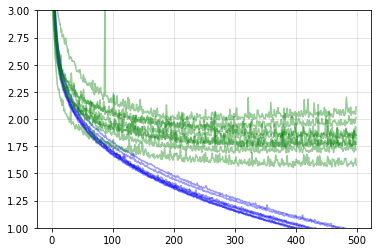

In [25]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

In [26]:
losses_pre_valid.min(axis=1).mean() / losses_rand_valid.min(axis=1).mean()

0.920113953062605

In [28]:
losses_pre_valid.min() / losses_rand_valid.min()

0.8566568899716352

In [29]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.920113953062605

In [30]:
data_casf = load_pdb_bind_filtered(filter_out_casf=False)

In [31]:
model_pres = [load_best_model(id_=i, kind='pre') for i in range(N_MODELS)]
model_rands = [load_best_model(id_=i, kind='rand') for i in range(N_MODELS)]

In [32]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [33]:
n_casf = len(data_casf)


In [34]:
testloader = get_data_loader(dataset=data_casf, batchsize=n_casf, shuffle=False)

In [35]:
output_pres = [get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]
output_rands = [get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]

In [36]:
output_pres = np.array(output_pres)
output_rands = np.array(output_rands)
output_pres_mean = output_pres.mean(axis=0)
output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

In [37]:
np.corrcoef(output_rands)

array([[1.        , 0.98565565, 0.98807984, 0.98679901, 0.98785166,
        0.98454653, 0.97782216, 0.9881346 ],
       [0.98565565, 1.        , 0.98811582, 0.98929203, 0.9852317 ,
        0.98466538, 0.98437455, 0.98611409],
       [0.98807984, 0.98811582, 1.        , 0.99001111, 0.98592706,
        0.98704733, 0.98085081, 0.98541922],
       [0.98679901, 0.98929203, 0.99001111, 1.        , 0.98740805,
        0.98613512, 0.98583164, 0.98714743],
       [0.98785166, 0.9852317 , 0.98592706, 0.98740805, 1.        ,
        0.9886531 , 0.97574198, 0.98972076],
       [0.98454653, 0.98466538, 0.98704733, 0.98613512, 0.9886531 ,
        1.        , 0.97455605, 0.98739406],
       [0.97782216, 0.98437455, 0.98085081, 0.98583164, 0.97574198,
        0.97455605, 1.        , 0.97980129],
       [0.9881346 , 0.98611409, 0.98541922, 0.98714743, 0.98972076,
        0.98739406, 0.97980129, 1.        ]])

In [38]:
np.triu(np.corrcoef(output_pres, dtype='float16'))

array([[1.    , 0.9707, 0.9663, 0.958 , 0.959 , 0.962 , 0.966 , 0.9727],
       [0.    , 1.    , 0.971 , 0.963 , 0.966 , 0.9653, 0.9697, 0.973 ],
       [0.    , 0.    , 1.    , 0.956 , 0.965 , 0.9604, 0.968 , 0.9707],
       [0.    , 0.    , 0.    , 0.9995, 0.9565, 0.9604, 0.962 , 0.964 ],
       [0.    , 0.    , 0.    , 0.    , 0.9995, 0.9575, 0.9614, 0.97  ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.967 , 0.9673],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9717],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ]],
      dtype=float16)

In [39]:
np.triu(np.corrcoef(output_rands, dtype='float16'))

array([[1.    , 0.9863, 0.9883, 0.9873, 0.988 , 0.985 , 0.9775, 0.9883],
       [0.    , 1.    , 0.989 , 0.99  , 0.986 , 0.985 , 0.9844, 0.9863],
       [0.    , 0.    , 1.    , 0.99  , 0.9854, 0.987 , 0.981 , 0.9854],
       [0.    , 0.    , 0.    , 1.    , 0.988 , 0.9863, 0.9863, 0.9873],
       [0.    , 0.    , 0.    , 0.    , 0.9995, 0.989 , 0.9756, 0.9897],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.974 , 0.9863],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9795],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995]],
      dtype=float16)

In [40]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)])

0.012947329305381228

In [41]:
get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

0.005231422840769273

In [42]:
get_corr(output_rands_mean, labels)

0.7973772615493325

In [43]:
get_corr(output_pres_mean, labels)

0.8393984958943149

In [44]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.042021234344982394

In [64]:
data_casf[np.argmax(np.abs(output_rands_mean - labels) - np.abs(output_pres_mean - labels))]


{'species': tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 3, 4,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 0, 1, 1,
         3, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
         3, 0, 1, 1, 3, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 0, 1, 3, 2, 0, 1, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 3, 1, 1, 3,
         3, 1, 1, 3, 1, 2, 0, 1, 1, 3, 1, 4, 2, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 3,
         1, 3, 1, 2, 0, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2, 0, 1,
         1, 3, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
         1, 3, 1, 1, 4, 2, 0, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 3, 1, 3, 0, 1, 2, 0,
         1, 1, 3, 2, 0, 1, 1, 3, 0, 2, 0, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 1, 1, 3,
         1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
         1, 1, 3, 1, 2, 0, 1, 1, 3, 1, 1, 3, 2, 0, 0, 2, 0, 1, 3, 2, 1, 1, 3, 1,
         1, 2, 0,

In [66]:
df_gen = load_df_gen()

In [68]:
df_gen[df_gen.ID == 13080]

,Resolution,Release_Year,pK,Binding_Type,Binding_Symbol,Refined,R_factor,R_free,delta_R,ID,CASF_2016
PDB_ID,,,,,,,,,,,
2VVN,1.85,2008,7.3,Kd,=,True,0.183,0.224,0.042,13080,True


In [62]:
labels

array([ 4.3 ,  3.28,  4.01,  9.89,  9.7 ,  7.96,  5.37,  6.48,  6.58,
        7.09, 11.15,  6.12,  5.  ,  8.25,  7.96,  7.4 ,  7.24,  6.8 ,
        4.89,  7.15,  4.76,  5.96,  9.04,  6.46,  5.15,  9.21,  5.44,
        2.27, 10.11,  6.17,  5.52,  9.72,  7.12,  8.4 ,  5.14,  4.86,
        7.6 ,  5.48,  8.02,  8.52,  6.06,  6.68,  6.42,  7.19, 10.3 ,
        9.  ,  9.54,  7.96,  6.11,  5.1 ,  3.66,  7.3 ,  8.52,  4.85,
        4.05,  4.45,  5.6 ,  7.05,  8.52,  6.32,  8.74,  6.12, 11.33,
        7.59,  8.43,  3.1 ,  7.2 ,  6.66,  6.83,  7.42,  5.79,  6.63,
        5.06,  9.46,  3.16,  6.32,  8.4 ,  4.76,  2.07,  7.15,  6.4 ,
        3.22,  5.64,  6.  ,  8.48,  5.16,  8.77,  8.4 ,  6.26,  5.36,
        6.02,  5.57,  3.76,  8.23,  8.  ,  8.85,  5.91,  4.19,  6.02,
        7.16,  7.7 ,  8.  ,  9.3 ,  8.11,  9.52,  2.36,  2.89,  6.9 ,
        7.26,  8.7 ,  2.52,  2.12,  5.1 ,  4.3 ,  5.72,  6.54,  6.89,
        6.3 ,  2.57,  8.1 ,  4.66, 10.7 ,  6.85,  3.7 ,  5.64, 11.82,
        7.26,  7.82,

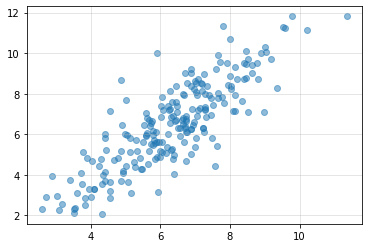

In [56]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

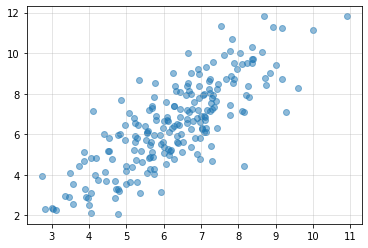

In [46]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);